In [2]:
# MDS503 Assignment 
# Zhao Yao B1901922
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vgsales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Section 1: Introduction to the problem statement, description of the hypothesis to be tested

The vgsales.csv dataset encompasses global video game sales information, encompassing columns like 'Rank,' 'Name,' 'Platform,' 'Year,' 'Genre,' 'Publisher,' 'NA_Sales,' 'EU_Sales,' 'JP_Sales,' 'Other_Sales,' and 'Global_Sales.' In this analysis, we aim to explore the impact of 'Genre,' 'Platform,' and 'Region' on video game sales. Due to the dataset's extensive size, we will narrow our focus to the top 5 genres and top 5 publishers across all games and representative platforms. To simplify the data, we will combine the 5 sales columns into one, adding a new 'Region' column to specify sales locations. Subsequently, we will build three linear models to delve deeper into their relationships.

Section 2: Exploratory Data Analysis

In [62]:
df.Publisher.value_counts()[:10]

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

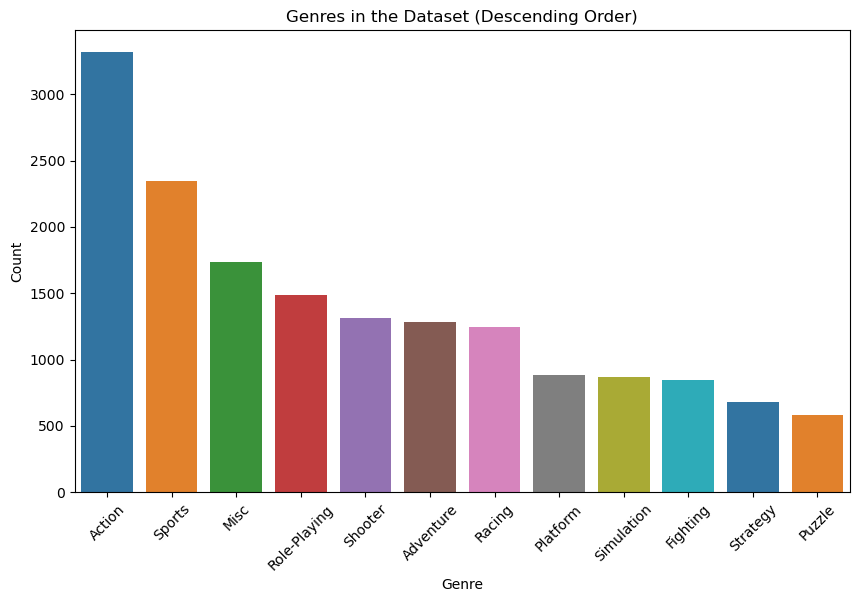

In [55]:
genre_counts = df['Genre'].value_counts()

# Sort the genre counts in descending order
sorted_genres = genre_counts.sort_values(ascending=False).index.tolist()

# Create a count plot to visualize the frequency of each genre
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df, order=sorted_genres, palette='tab10')

# Set plot labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genres in the Dataset (Descending Order)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()




From the graph we can see the all genres in the dataset in the descending order. Among all genres, Action, Sports, Misc, Role-Playing and Shooter has the highest amount of games, so these will be chosen to the new dataset. 

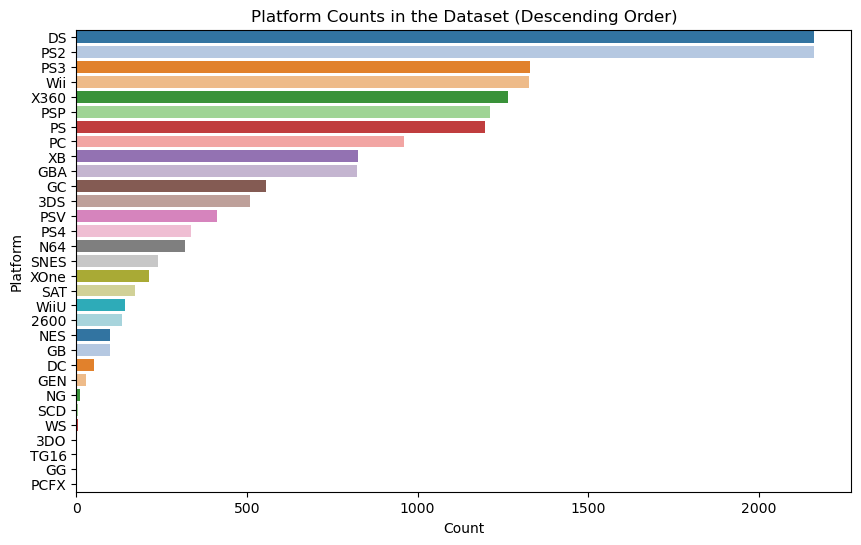

In [56]:
platform_counts = df['Platform'].value_counts()

# Sort the platform counts in descending order
sorted_platforms = platform_counts.sort_values(ascending=False).index.tolist()

# Create a count plot to visualize the frequency of each platform
plt.figure(figsize=(10, 6))
sns.countplot(y='Platform', data=df, order=sorted_platforms, palette='tab20')

# Set plot labels and title
plt.xlabel('Count')
plt.ylabel('Platform')
plt.title('Platform Counts in the Dataset (Descending Order)')

# Show the plot
plt.show()

From this graph we can see the counts in the dataset. Among all of these platforms, DS, PS2, PS3, Wii, X360 are the top 5 platforms in the dataset. Since PS2, PS3, PS4 and PS5 are the series, we'll choose the one with most data which is PS2 as one of the research platforms. The other 4 will be DS, Wii, XB and PC.

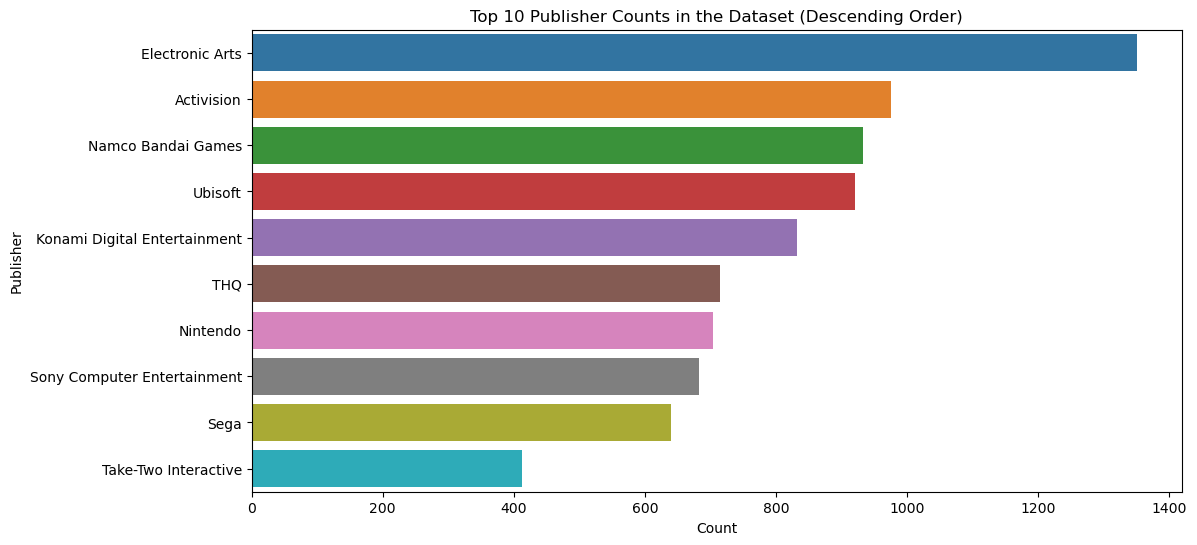

In [58]:
# Group the data by the 'Publisher' column and count the occurrences of each publisher
publisher_counts = df['Publisher'].value_counts()

# Sort the publisher counts in descending order
sorted_publishers = publisher_counts.sort_values(ascending=False).index.tolist()

# Create a count plot to visualize the frequency of each publisher
plt.figure(figsize=(12, 6))
sns.countplot(y='Publisher', data=df, order=sorted_publishers[:10], palette='tab10')

# Set plot labels and title
plt.xlabel('Count')
plt.ylabel('Publisher')
plt.title('Top 10 Publisher Counts in the Dataset (Descending Order)')

# Show the plot
plt.show()

From this code we can see the top 10 publishers of all games in the dataset. For my research, I'll choose the data from the top 5 publishers as they're representating the gaming industry. 

In [60]:
filtered_df = df.loc[df.Platform.isin(['DS','Wii','XB','PC','PS2'])]\
.loc[lambda df: df.Publisher.isin(['Electronic Arts','Activision','Namco Bandai Games',
                                    'Ubisoft', 'Konami Digital Entertainment'])]\
.loc[lambda df: df.Genre.isin(['Action','Sports','Misc','Role-Playing','Shooter'])]\
.pipe(pd.melt, id_vars=['Platform', 'Publisher', 'Genre', 'Year'], value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], \
    var_name='Region',value_name='Sales')\
.assign(Region=lambda df: df.Region.str.strip('_Sales'))
    

Section 3: Model Selection and Diagnostics

In [45]:
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [81]:
# first linear model
model1 = smf.ols('Sales~Genre',data=filtered_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     22.46
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           4.29e-34
Time:                        15:52:50   Log-Likelihood:                -2265.5
No. Observations:                5880   AIC:                             4549.
Df Residuals:                    5871   BIC:                             4609.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0316      0.012      2.639      0.008       0.008       0.055
Genre[T.Misc]             0.0425      0.014      2.953      0.003       0.014       0.071
Genre[T.Role-Playing]     0.0460      0.019      2.451      0.014       0.009       0.083
Genre[T.Shooter]          0.0334      0.016      2.118      0.034       0.002       0.064
Genre[T.Sports]           0.0282      0.012      2.291      0.022       0.004       0.052
Platform[T.PC]            0.0448      0.017      2.591      0.010       0.011       0.079
Platform[T.PS2]           0.1561      0.013     11.743      0.000       0.130       0.182
Platform[T.Wii]           0.1045      0.014      7.364      0.000       0.077       0.132
Platform[T.XB]            0.0693      0.017      4.161      0.000       0.037       0.102
==============================================================================
Omnibus:                     7097.606   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1077769.762
Skew:                           6.406   Prob(JB):                         0.00
Kurtosis:                      68.076   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the initial linear model, I selected the 'Genre' variable to investigate its relationship with the 'Sales' variable. Notably, the p-value of each 'Genre' variable is less than 0.05, rendering all 'Genre' variables significant contributors to the model, considering the influence of other variables on the model's variance. Hence, the 'Genre' variable holds significance in this context. However, the model's r-squared value is only 0.004, indicating that merely 0.4% of the variance in 'Sales' can be explained by the dependent variable 'Genre.' Therefore, to gain deeper insights, we should include additional variables in the subsequent model.

In [83]:
#second linear model
model2 = smf.ols('Sales~Genre+Platform',data=filtered_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     22.46
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           4.29e-34
Time:                        15:54:39   Log-Likelihood:                -2265.5
No. Observations:                5880   AIC:                             4549.
Df Residuals:                    5871   BIC:                             4609.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0316      0.012      2.639      0.008       0.008       0.055
Genre[T.Misc]             0.0425      0.014      2.953      0.003       0.014       0.071
Genre[T.Role-Playing]     0.0460      0.019      2.451      0.014       0.009       0.083
Genre[T.Shooter]          0.0334      0.016      2.118      0.034       0.002       0.064
Genre[T.Sports]           0.0282      0.012      2.291      0.022       0.004       0.052
Platform[T.PC]            0.0448      0.017      2.591      0.010       0.011       0.079
Platform[T.PS2]           0.1561      0.013     11.743      0.000       0.130       0.182
Platform[T.Wii]           0.1045      0.014      7.364      0.000       0.077       0.132
Platform[T.XB]            0.0693      0.017      4.161      0.000       0.037       0.102
==============================================================================
Omnibus:                     7097.606   Durbin-Watson:                   0.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1077769.762
Skew:                           6.406   Prob(JB):                         0.00
Kurtosis:                      68.076   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the second linear model, I introduced the 'Platform' variable to explore its influence on game sales. Analyzing the OLS result table, we find that the p-values of each 'Platform' variable are less than 0.05. This suggests that, while considering the impact of all other variables on the variance of 'Sales,' the 'Platform' variables hold statistical significance in relation to 'Sales.'

In [78]:
#third linear model
model3 = smf.ols('Sales~Genre+Region+Platform',data=filtered_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     63.91
Date:                Sun, 06 Aug 2023   Prob (F-statistic):          2.16e-135
Time:                        14:49:44   Log-Likelihood:                -2021.4
No. Observations:                5880   AIC:                             4067.
Df Residuals:                    5868   BIC:                             4147.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0522      0.014      3.769      0.000       0.025       0.079
Genre[T.Misc]             0.0425      0.014      3.078      0.002       0.015       0.070
Genre[T.Role-Playing]     0.0460      0.018      2.554      0.011       0.011       0.081
Genre[T.Shooter]          0.0334      0.015      2.207      0.027       0.004       0.063
Genre[T.Sports]           0.0282      0.012      2.387      0.017       0.005       0.051
Region[T.JP]             -0.1227      0.013     -9.736      0.000      -0.147      -0.098
Region[T.NA]              0.1345      0.013     10.678      0.000       0.110       0.159
Region[T.Other]          -0.0941      0.013     -7.471      0.000      -0.119      -0.069
Platform[T.PC]            0.0448      0.017      2.700      0.007       0.012       0.077
Platform[T.PS2]           0.1561      0.013     12.237      0.000       0.131       0.181
Platform[T.Wii]           0.1045      0.014      7.674      0.000       0.078       0.131
Platform[T.XB]            0.0693      0.016      4.336      0.000       0.038       0.101
==============================================================================
Omnibus:                     7159.718   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1205584.781
Skew:                           6.465   Prob(JB):                         0.00
Kurtosis:                      71.946   Cond. No.                         6.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the third linear model, I incorporated the 'Region' variable. Analyzing the OLS results, we observe that all 'Region' variables have p-values less than 0.05. This suggests that, while accounting for the impact of all other variables on the variance of 'Sales,' the 'Region' variables hold statistical significance in relation to 'Sales' as well.
However, it's worth noting that the 'Region[T.JP]' and 'Region[T.Other]' variables have negative coefficients. This indicates that, given the chosen top 5 genres and platforms, as the sales of the games increase, the sales in the Northern America region also increase, but the sales in Japan and other regions decrease.

In [80]:
# Anova test
sm.stats.anova_lm(model1,model2,model3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5875.0,763.609986,0.0,NaN,NaN,NaN
1,5872.0,704.340704,3.0,59.269281,169.315285,2.824120e-105
2,5868.0,684.703181,4.0,19.637523,42.074066,7.713027e-35


H0: model 1: Sales = b1 * Genre (b2 = 0) (restricted model)
H1: model 2: Sales = b1 * Genre + b2 * Region (unrestricted model)

From the anova test result, the Pr(>F) value 2.824120e-105 is less than 0.05, thus, assuming the model is explained by Genre, we can reject the null hypothesis that b2 = 0, showing that Region explains variation in Sales.

H0: model 2: Sales = b1 * Genre + b2 * Region (b3=0) (restricted model)
H1: model 3: Sales = b1 * Genre + b2 * Region + b3 * Platform

From the anova test result, the Pr(>F) value 7.713027e-35 is less than 0.05, thus, assuming the model is explained by Genre and Region, we can reject the null hypothesis that b3 = 0, showing that Platform explains variation in Sales. 

From the above tests ,we can see both Region and Platform are significant variables to response variable Sales. In conclusion, the model should contain these two variable, so model3 is the selected model after Annova test.

Section 4: Findings and interpretation

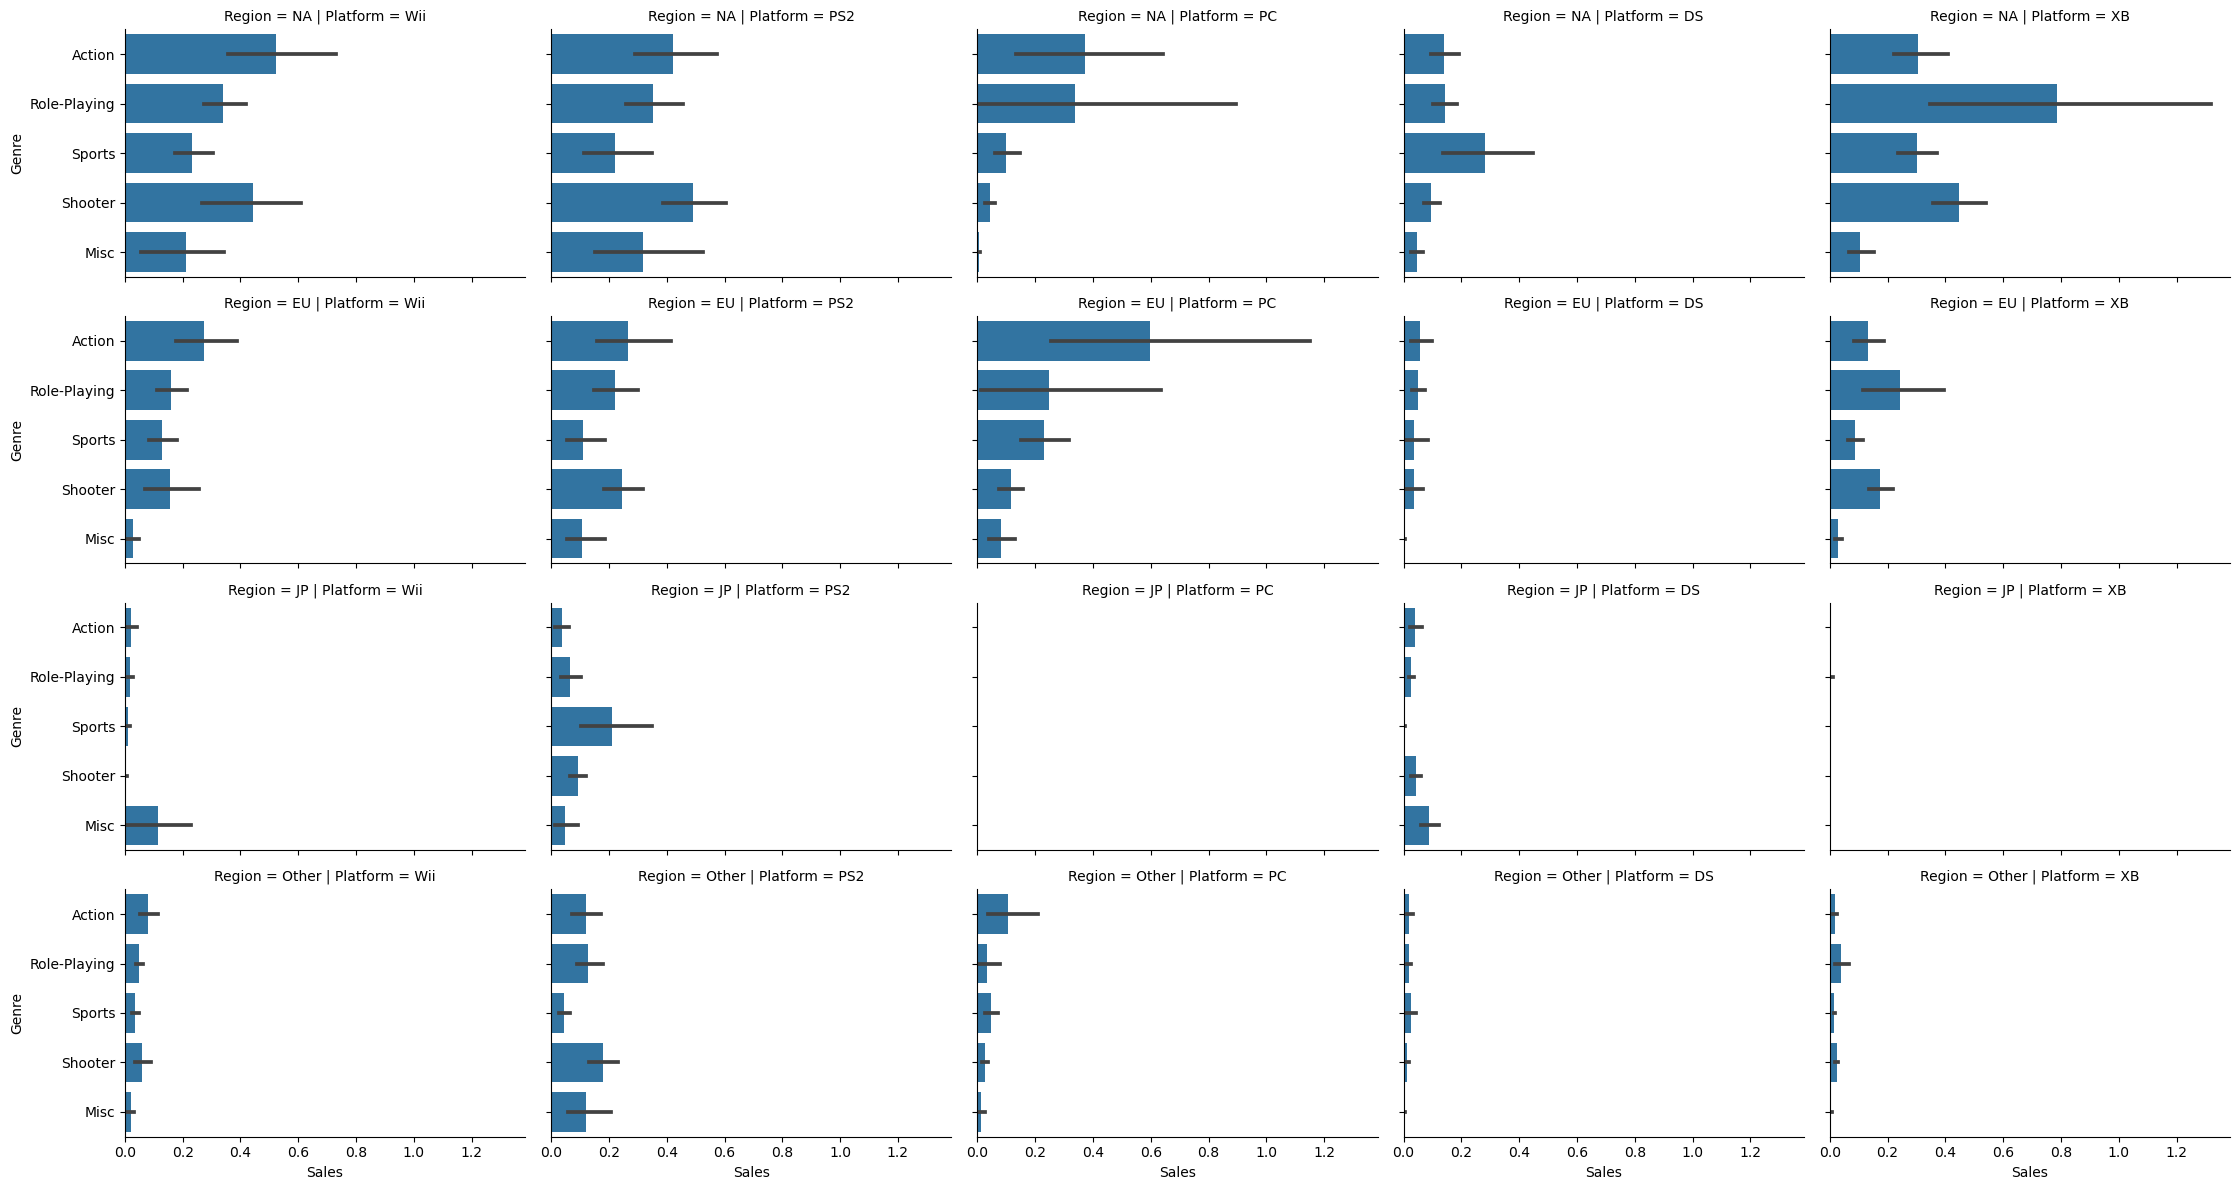

In [86]:
g  = sns.FacetGrid(filtered_df, row='Region', col='Platform', aspect=1.5)
g.map_dataframe(sns.barplot, y='Genre', x='Sales')

In the linear model3 we constructed in Section 3, we observed that Genre, Region, and Platform are significant variables impacting Sales. The barplot we generated depicts the relationship between Genre and Sales, considering different countries and platforms. As found in model3 analysis, the 'Region[T.JP]' and 'Region[T.Other]' variables have negative coefficients, indicating that, within the chosen top 5 genres and platforms, increasing game sales in Northern America corresponds to an increase in sales there, while sales in Japan and other regions decrease.

The graph reinforces this finding, showing that as game sales increase, sales in North America also rise, aligning with model3 analysis. Additionally, the graph reveals that North American audiences favor Action and Shooter games from Wii and PS2, along with Role-Playing games from Xbox. Therefore, vendors in North America should consider stocking more of these games to maximize profits.

It's worth noting that Japan and other markets exhibit negative coefficients in model3 and appear to have fewer data points on the graph. This could be attributed to these regions using more advanced platforms, such as PS4 and Nintendo Switch. As a result, vendors selling games in these regions might import games from platforms not selected in this research.

Section 5: Conclusion


In conclusion, this analysis explored the impact of 'Genre,' 'Platform,' and 'Region' on video game sales using the vgsales.csv dataset. We narrowed our focus to the top 5 genres, top 5 publishers, and representative platforms to simplify the data. After conducting three linear models, we found that both 'Region' and 'Platform' are significant variables impacting sales, alongside 'Genre.' The chosen model (model3) includes all three variables, indicating their importance in explaining variations in sales.

The findings from the barplot and model analysis revealed that game sales in North America positively correlate with an increase in sales, while sales in Japan and other regions decrease under similar circumstances. North American audiences exhibit a preference for Action and Shooter games from Wii and PS2, as well as Role-Playing games from Xbox, suggesting potential profit opportunities for vendors in this region.

It is essential to consider that Japan and other markets might have negative coefficients due to their preference for more advanced platforms like PS4 and Nintendo Switch, leading vendors in these regions to import games from platforms not considered in this research.

Overall, this analysis provides valuable insights into the factors influencing video game sales, helping game developers and vendors tailor their strategies to cater to different regions and audiences.